### Comparar algoritmos de aprendizado de máquina

É importante comparar o desempenho de vários algoritmos de aprendizado de máquina diferentes
consistentemente. Neste capítulo, você descobrirá como criar um equipamento de teste para comparar
vários algoritmos diferentes de aprendizado de máquina em Python com scikit-learn. você pode usar isso
teste o arnês como um modelo em seus próprios problemas de aprendizado de máquina e adicione mais e diferentes
algoritmos para comparar. Depois de concluir esta lição, você saberá:
1. Como formular um experimento para comparar diretamente algoritmos de aprendizado de máquina.
2. Um modelo reutilizável para avaliar o desempenho de vários algoritmos em um conjunto de dados.
3. Como relatar e visualizar os resultados ao comparar o desempenho do algoritmo.
Vamos começar.

#### Escolha o melhor modelo de aprendizado de máquina

Quando você trabalha em um projeto de aprendizado de máquina, geralmente acaba com vários modelos bons
escolher a partir de. Cada modelo terá características de desempenho diferentes. Usando reamostragem
métodos como validação cruzada, você pode obter uma estimativa da precisão de cada modelo
dados não vistos. Você precisa ser capaz de usar essas estimativas para escolher um ou dois melhores modelos de
o conjunto de modelos que você criou.

Quando você tem um novo conjunto de dados, é uma boa ideia visualizar os dados usando técnicas diferentes
a fim de olhar para os dados de diferentes perspectivas. A mesma ideia se aplica à seleção do modelo.
Você deve usar várias maneiras diferentes de observar a precisão estimada de sua máquina
algoritmos de aprendizado para escolher um ou dois algoritmos para nalizar. Uma maneira de fazer isso é
usar métodos de visualização para mostrar a precisão média, variância e outras propriedades do
distribuição das precisões do modelo. Na próxima seção, você descobrirá exatamente como fazer
isso em Python com scikit-learn.

#### Comparar algoritmos de aprendizado de máquina consistentemente

A chave para uma comparação justa de algoritmos de aprendizado de máquina é garantir que cada algoritmo seja
avaliados da mesma forma com os mesmos dados. Você pode conseguir isso forçando cada algoritmo a ser avaliado em um equipamento de teste consistente. No exemplo abaixo, seis classificações diferentes
algoritmos são comparados em um único conjunto de dados:
Regressão Logística.
Análise Discriminante Linear.
k-vizinhos mais próximos.
Árvores de classificação e regressão.
Naive Bayes.
Máquinas de vetores de suporte.

O conjunto de dados é o início do problema de diabetes dos índios Pima. O problema tem duas classes e
oito variáveis de entrada numérica de escalas variadas. O procedimento de validação cruzada de 10 vezes é usado para
avalie cada algoritmo, importantemente configurado com a mesma semente aleatória para garantir que o
mesmas divisões para os dados de treinamento são realizadas e que cada algoritmo é avaliado com precisão
o mesmo caminho. Cada algoritmo recebe um nome curto, útil para resumir os resultados posteriormente.

LR: 0.772129 (0.054933)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.691336 (0.068082)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


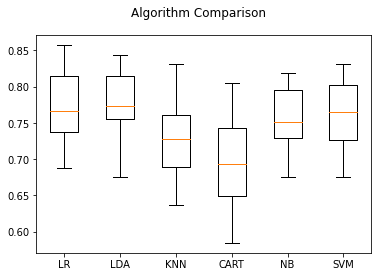

In [1]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# load dataset
filename = 'datasets/diabetes.csv'
names = ['preg', 'plas', 'pres',
         'skin', 'test', 'mass', 
         'pedi', 'age', 'class']

dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

A execução do exemplo fornece uma lista de cada nome abreviado do algoritmo, a precisão média e
a precisão do desvio padrão.

In [2]:
pyplot.show()

O exemplo também fornece um gráfico de caixa e bigode mostrando a distribuição das pontuações de precisão
em cada dobra de validação cruzada para cada algoritmo.

A partir desses resultados, sugere-se que tanto a regressão logística quanto o discriminante linear
talvez mereçam um estudo mais aprofundado sobre este problema.

In [3]:
%reload_ext watermark
%watermark -gu "caiquemiranda" -iv

Github username: caiquemiranda

matplotlib: 3.5.2



### End.